In [13]:
text ='Next character prediction is a fundamental task in the field of natural language processing (NLP) that involves predicting the next character in a sequence of text based on the characters that precede it. This task is essential for various applications, including text auto-completion, spell checking, and even in the development of sophisticated AI models capable of generating human-like text. At its core, next character prediction relies on statistical models or deep learning algorithms to analyze a given sequence of text and predict which character is most likely to follow. These predictions are based on patterns and relationships learned from large datasets of text during the training phase of the model. One of the most popular approaches to next character prediction involves the use of Recurrent Neural Networks (RNNs), and more specifically, a variant called Long Short-Term Memory (LSTM) networks. RNNs are particularly well-suited for sequential data like text, as they can maintain information in "memory" about previous characters to inform the prediction of the next character. LSTM networks enhance this capability by being able to remember long-term dependencies, making them even more effective for next character prediction tasks. Training a model for next character prediction involves feeding it large amounts of text data, allowing it to learn the probability of each characters appearance following a sequence of characters. During this training process, the model adjusts its parameters to minimize the difference between its predictions and the actual outcomes, thus improving its predictive accuracy over time. Once trained, the model can be used to predict the next character in a given piece of text by considering the sequence of characters that precede it. This can enhance user experience in text editing software, improve efficiency in coding environments with auto-completion features, and enable more natural interactions with AI-based chatbots and virtual assistants. In summary, next character prediction plays a crucial role in enhancing the capabilities of various NLP applications, making text-based interactions more efficient, accurate, and human-like. Through the use of advanced machine learning models like RNNs and LSTMs, next character prediction continues to evolve, opening new possibilities for the future of text-based technology.'

Training with sequence length: 10
Epoch: 1, Train Loss: 3.1425, Train Accuracy: 0.1251, Val Loss: 2.9004, Val Accuracy: 0.1617, Duration: 1.35s
Epoch: 2, Train Loss: 2.7522, Train Accuracy: 0.2180, Val Loss: 2.6166, Val Accuracy: 0.2319, Duration: 0.82s
Epoch: 3, Train Loss: 2.6080, Train Accuracy: 0.2354, Val Loss: 2.5271, Val Accuracy: 0.2539, Duration: 0.83s
Epoch: 4, Train Loss: 2.5739, Train Accuracy: 0.2348, Val Loss: 2.4487, Val Accuracy: 0.2517, Duration: 0.81s
Epoch: 5, Train Loss: 2.5655, Train Accuracy: 0.2270, Val Loss: 2.4440, Val Accuracy: 0.2711, Duration: 0.81s
Epoch: 6, Train Loss: 2.4695, Train Accuracy: 0.2468, Val Loss: 2.4158, Val Accuracy: 0.2398, Duration: 0.79s
Epoch: 7, Train Loss: 2.4801, Train Accuracy: 0.2431, Val Loss: 2.3747, Val Accuracy: 0.2608, Duration: 0.76s
Epoch: 8, Train Loss: 2.4365, Train Accuracy: 0.2526, Val Loss: 2.3781, Val Accuracy: 0.2583, Duration: 0.75s
Epoch: 9, Train Loss: 2.4168, Train Accuracy: 0.2637, Val Loss: 2.3457, Val Accuracy: 

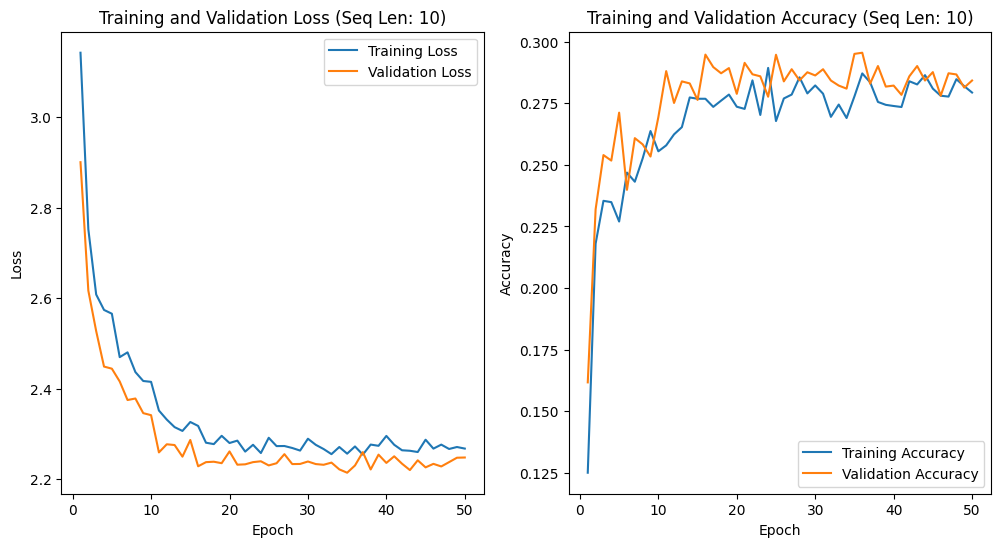

Training with sequence length: 20
Epoch: 1, Train Loss: 3.1476, Train Accuracy: 0.1261, Val Loss: 3.0598, Val Accuracy: 0.1475, Duration: 0.91s
Epoch: 2, Train Loss: 2.8697, Train Accuracy: 0.1899, Val Loss: 2.6477, Val Accuracy: 0.2583, Duration: 0.91s
Epoch: 3, Train Loss: 2.6475, Train Accuracy: 0.2397, Val Loss: 2.5237, Val Accuracy: 0.2676, Duration: 0.91s
Epoch: 4, Train Loss: 2.6031, Train Accuracy: 0.2305, Val Loss: 2.5479, Val Accuracy: 0.2512, Duration: 0.93s
Epoch: 5, Train Loss: 2.5630, Train Accuracy: 0.2340, Val Loss: 2.4645, Val Accuracy: 0.2681, Duration: 0.92s
Epoch: 6, Train Loss: 2.5148, Train Accuracy: 0.2475, Val Loss: 2.4467, Val Accuracy: 0.2533, Duration: 0.92s
Epoch: 7, Train Loss: 2.5056, Train Accuracy: 0.2544, Val Loss: 2.5002, Val Accuracy: 0.2550, Duration: 0.91s
Epoch: 8, Train Loss: 2.4818, Train Accuracy: 0.2377, Val Loss: 2.3909, Val Accuracy: 0.2758, Duration: 0.91s
Epoch: 9, Train Loss: 2.4579, Train Accuracy: 0.2439, Val Loss: 2.3893, Val Accuracy: 

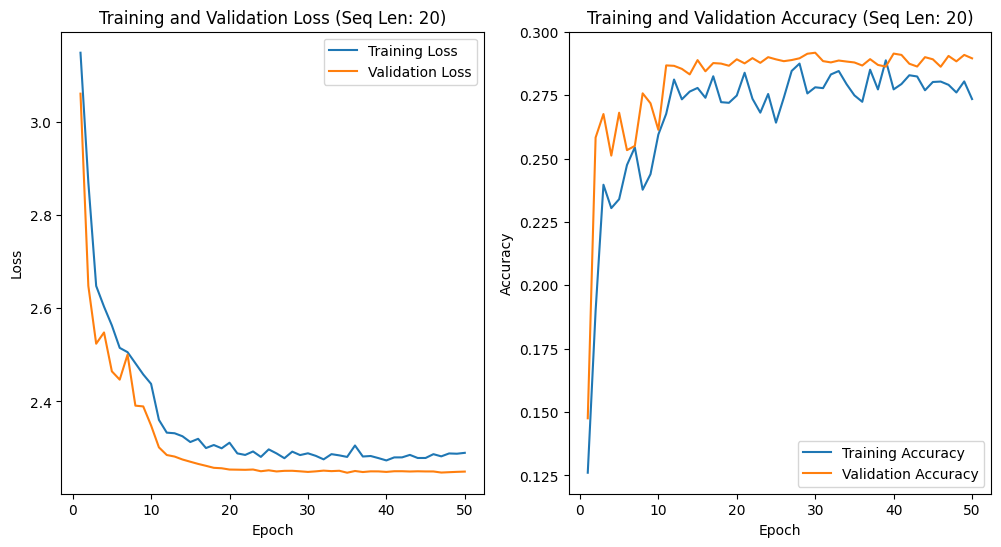

Training with sequence length: 30
Epoch: 1, Train Loss: 3.1622, Train Accuracy: 0.1120, Val Loss: 2.9882, Val Accuracy: 0.1473, Duration: 1.23s
Epoch: 2, Train Loss: 2.7754, Train Accuracy: 0.2192, Val Loss: 2.6262, Val Accuracy: 0.2548, Duration: 1.25s
Epoch: 3, Train Loss: 2.6743, Train Accuracy: 0.2246, Val Loss: 2.5336, Val Accuracy: 0.2597, Duration: 1.25s
Epoch: 4, Train Loss: 2.5694, Train Accuracy: 0.2474, Val Loss: 2.4976, Val Accuracy: 0.2495, Duration: 1.23s
Epoch: 5, Train Loss: 2.5578, Train Accuracy: 0.2435, Val Loss: 2.4953, Val Accuracy: 0.2510, Duration: 1.21s
Epoch: 6, Train Loss: 2.5474, Train Accuracy: 0.2329, Val Loss: 2.3875, Val Accuracy: 0.2631, Duration: 1.19s
Epoch: 7, Train Loss: 2.4951, Train Accuracy: 0.2501, Val Loss: 2.4080, Val Accuracy: 0.2674, Duration: 1.29s
Epoch: 8, Train Loss: 2.4800, Train Accuracy: 0.2403, Val Loss: 2.4022, Val Accuracy: 0.2674, Duration: 1.29s
Epoch: 9, Train Loss: 2.4694, Train Accuracy: 0.2415, Val Loss: 2.3748, Val Accuracy: 

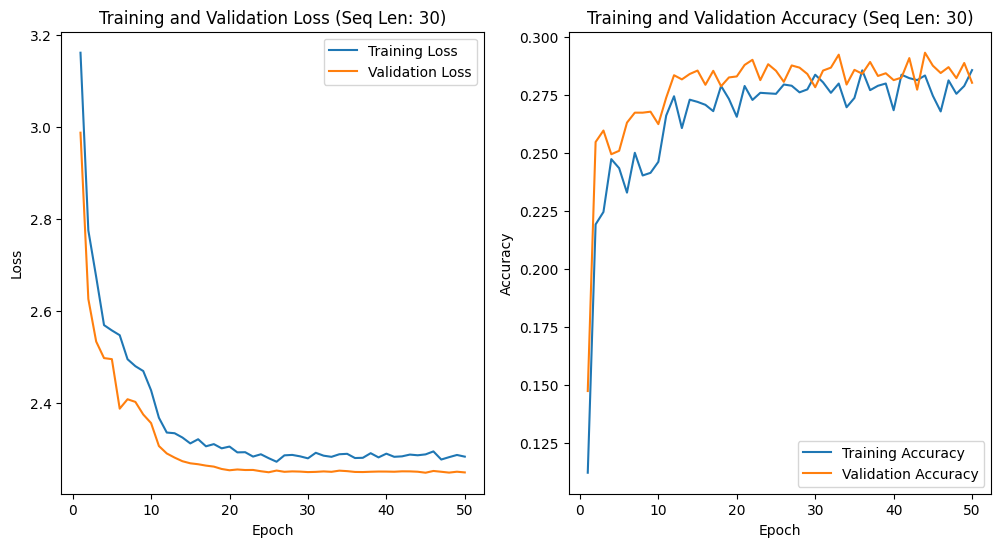

Overall accuracy for sequence length 10: 0.2842
Overall accuracy for sequence length 20: 0.2896
Overall accuracy for sequence length 30: 0.2803


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import time
import matplotlib.pyplot as plt

# Create character mapping
chars = sorted(set(text))
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

# Helper function to create input and target sequences
def create_sequences(text, seq_length):
    inputs = []
    targets = []
    for i in range(len(text) - seq_length):
        input_seq = text[i:i + seq_length]
        target_char = text[i + seq_length]
        inputs.append([char_to_ix[ch] for ch in input_seq])
        targets.append(char_to_ix[target_char])
    return torch.tensor(inputs, dtype=torch.long), torch.tensor(targets, dtype=torch.long)

# Define the Transformer model
class CharTransformer(nn.Module):
    def __init__(self, vocab_size, hidden_size, nhead, num_layers, dropout=0.1):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        encoder_layers = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.fc_out = nn.Linear(hidden_size, vocab_size)

    def forward(self, src):
        embedded = self.embedding(src) * np.sqrt(self.hidden_size)
        transformer_output = self.transformer_encoder(embedded)
        return self.fc_out(transformer_output[:, -1])

# Training and evaluation function
def train_and_evaluate(model, data_loader, criterion, optimizer, scheduler, device, clip):
    model.to(device)
    model.train()
    total_loss = 0
    total_accuracy = 0  # Track total accuracy
    start_time = time.time()

    for inputs, targets in data_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, targets)
        loss.backward()
        # Gradient clipping
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)
        optimizer.step()
        total_loss += loss.item()
        total_accuracy += (output.argmax(1) == targets).float().mean().item()

    # Adjust the learning rate
    scheduler.step()
    duration = time.time() - start_time
    total_accuracy /= len(data_loader)  # Calculate mean accuracy over all batches

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            output = model(inputs)
            val_loss += criterion(output, targets).item()
            val_accuracy += (output.argmax(1) == targets).float().mean().item()

    val_loss /= len(data_loader)
    val_accuracy /= len(data_loader)
    return total_loss / len(data_loader), total_accuracy, val_loss, val_accuracy, duration

# Prepare data for different sequence lengths
sequence_lengths = [10, 20, 30]
results = {}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train and validate for each sequence length
for seq_length in sequence_lengths:
    print(f"Training with sequence length: {seq_length}")
    inputs, targets = create_sequences(text, seq_length)
    dataset = TensorDataset(inputs, targets)
    data_loader = DataLoader(dataset, batch_size=64, shuffle=True)
    
    model = CharTransformer(len(chars), 256, 8, 6, dropout=0.3)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    clip = 1.0  # Gradient clipping

    epochs = 50
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(epochs):
        train_loss, train_accuracy, val_loss, val_accuracy, duration = train_and_evaluate(
            model, data_loader, criterion, optimizer, scheduler, device, clip)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        print(f"Epoch: {epoch + 1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Duration: {duration:.2f}s")

    results[seq_length] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }

    # Plotting training and validation metrics
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
    plt.title(f'Training and Validation Loss (Seq Len: {seq_length})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy (Seq Len: {seq_length})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print overall accuracy for each sequence length
for seq_length in sequence_lengths:
    print(f"Overall accuracy for sequence length {seq_length}: "
          f"{results[seq_length]['val_accuracies'][-1]:.4f}")


In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import requests
import time
import math
import numpy as np

# Download the dataset
url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
response = requests.get(url)
text = response.text

# Character mapping to integers
chars = sorted(list(set(text)))
char_to_int = {ch: i for i, ch in enumerate(chars)}
int_to_char = {i: ch for i, ch in enumerate(chars)}
vocab_size = len(chars)

# Dataset class
class CharDataset(Dataset):
    def __init__(self, text, seq_length):
        self.text = text
        self.seq_length = seq_length
        self.char_to_int = char_to_int

    def __len__(self):
        return len(self.text) - self.seq_length

    def __getitem__(self, index):
        seq = self.text[index:index+self.seq_length]
        target = self.text[index+self.seq_length]
        return (torch.tensor([self.char_to_int[ch] for ch in seq], dtype=torch.long),
                torch.tensor(self.char_to_int[target], dtype=torch.long))

# Transformer Model class
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, hidden_dim, nhead, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.pos_encoder = nn.Embedding(5000, hidden_dim)  # Positional encoding for up to 5000 positions
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=nhead, dropout=dropout),
            num_layers=num_layers)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)

    def forward(self, src, src_mask):
        src = self.embedding(src) * math.sqrt(self.hidden_dim)
        src = src + self.pos_encoder(torch.arange(0, src.size(1)).unsqueeze(0).to(src.device))
        output = self.transformer(src, src_mask)
        return self.fc_out(output)

# Function to generate a square mask for sequence masking
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask

def train_and_validate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    for epoch in range(epochs):
        # Training
        model.train()
        total_train_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            mask = generate_square_subsequent_mask(data.size(0)).to(device)
            output = model(data, mask)
            loss = criterion(output.view(-1, vocab_size), target.view(-1))
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        avg_train_loss = total_train_loss / len(train_loader)

        # Validation
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(val_loader):
                data, target = data.to(device), target.to(device)
                mask = generate_square_subsequent_mask(data.size(0)).to(device)
                output = model(data, mask)
                loss = criterion(output.view(-1, vocab_size), target.view(-1))
                total_val_loss += loss.item()
        avg_val_loss = total_val_loss / len(val_loader)

        print(f'Epoch: {epoch+1}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')
    return model, avg_train_loss, avg_val_loss

def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Hyperparameters to tune
    sequence_lengths = [20, 30, 50]
    hidden_dims = [256, 512]
    num_heads = [4, 8]
    num_layers_options = [3, 4]
    dropout_rates = [0.1, 0.2]
    learning_rate = 0.001
    epochs = 10  # May need to adjust based on convergence

    for seq_len in sequence_lengths:
        dataset = CharDataset(text, seq_len)
        train_size = int(0.8 * len(dataset))
        val_size = len(dataset) - train_size
        train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
        
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
        
        for hidden_dim in hidden_dims:
            for num_head in num_heads:
                for num_layer in num_layers_options:
                    for dropout_rate in dropout_rates:
                        model = TransformerModel(vocab_size, hidden_dim, num_head, num_layer, dropout_rate).to(device)
                        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
                        criterion = nn.CrossEntropyLoss()
                        
                        print(f'Training with seq_len: {seq_len}, hidden_dim: {hidden_dim}, '
                              f'num_head: {num_head}, num_layer: {num_layer}, dropout_rate: {dropout_rate}')
                        
                        trained_model, train_loss, val_loss = train_and_validate(
                            model, train_loader, val_loader, optimizer, criterion, epochs, device)
                        
                        print(f'Seq_len: {seq_len}, Hidden_dim: {hidden_dim}, Num_heads: {num_head}, '
                              f'Num_layers: {num_layer}, Dropout: {dropout_rate}, '
                              f'Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}')
        
if __name__ == '__main__':
    main() 

C:\Users\SirM\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Training with seq_len: 20, hidden_dim: 256, num_head: 4, num_layer: 3, dropout_rate: 0.1


ValueError: Expected input batch_size (1280) to match target batch_size (64).